In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import streamlit as st 


In [ ]:
def read_image (path):
    img = cv2.imread (path)
    return cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [231 242 243]
  [231 242 243]
  [231 242 243]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [231 242 243]
  [231 242 243]
  [231 242 243]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [231 242 243]
  [231 242 243]
  [231 242 243]]]


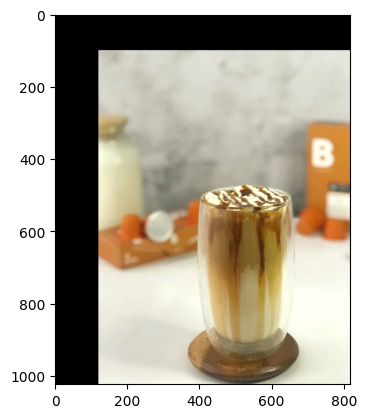

In [ ]:
# file upload
uploaded_file = st.file_uploader("Choose an image", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
        # read image
        bytes_data = uploaded_file.read()
        nparr = np.frombuffer(bytes_data, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
else:
    img = read_image ("haha.jpg")

In [17]:
# get the image shape
rows, cols, dim = img.shape
# transformation matrix for translation
M = np.float32([[1, 0, 60],
                [0, 1, 50],
                [0, 0, 1]])

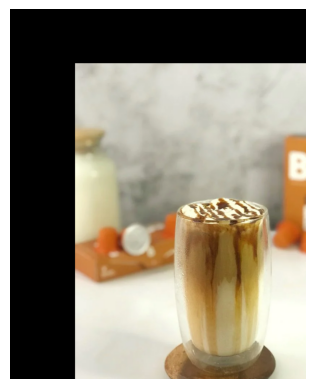

In [18]:
# apply a perspective transformation to the image
translated_img = cv2.warpPerspective(img, M, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the resulting image
st.image (translated_img,img)
plt.show()
# save the resulting image to disk


In [19]:
#rotation transformation matrix
angle= np.radians(10)
m_rotation_ = np.float32([[np.cos(angle), -(np.sin(angle)),0],[np.sin(angle),np.cos(angle),0],[0,0,1]])

In [20]:
rotated_img_ = cv2.warpPerspective(img ,m_rotation_,(int(cols),int(rows)))

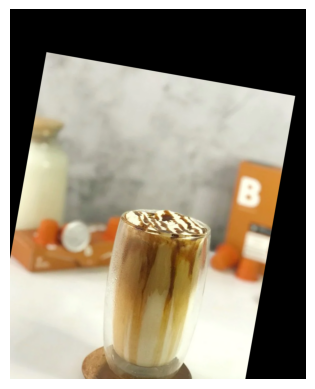

In [21]:
plt.axis('off')
st.image(rotated_img_)

In [22]:
m_rotation_=cv2.getRotationMatrix2D((cols/2,rows/2),90,1)

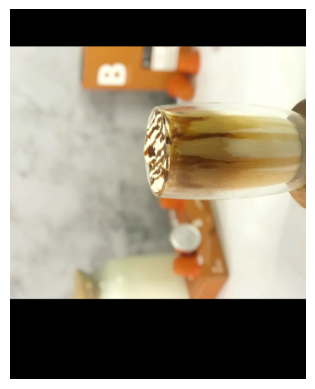

In [23]:
rotated_img_=cv2.warpAffine(img ,m_rotation_,(cols,rows))
plt.axis('off')
st.image(rotated_img_)

In [24]:
#scaling transformation matrix
m_scaling_=np.float32([[1.5,0,0],[0,1.8,0],[0,0,1]])
scaled_img_=cv2.warpPerspective(img, m_scaling_,(cols*2,rows*2))


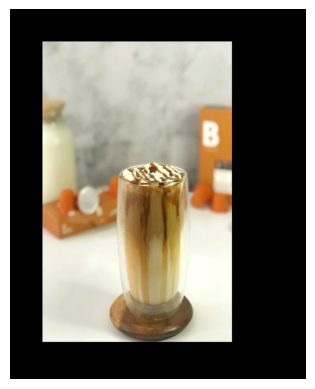

In [25]:
plt.axis('off')
st.image(scaled_img_)

In [26]:
resized_img_=cv2.resize(img, None,fx=4,fy=4, interpolation=cv2.INTER_CUBIC)
resized_img_.shape


(4096, 3276, 3)

In [27]:
resized_img_=cv2.resize(img,None,fx=5,fy=5, interpolation = cv2.INTER_CUBIC)
resized_img_.shape

(5120, 4095, 3)

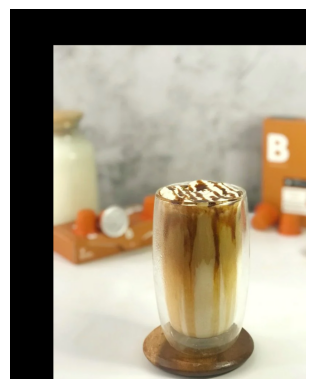

In [28]:
plt.axis('off')
st.image(resized_img_)

In [29]:
#OR
height, width = img.shape[:2]
resized_img_= cv2.resize(img,(8*width, 8*height), interpolation = cv2.INTER_CUBIC)
resized_img_.shape

(8192, 6552, 3)

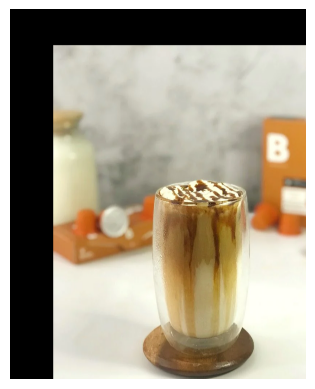

In [30]:
plt.axis('off')
st.image(resized_img_)

In [31]:
#transformation matrix